### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [2]:
!pip install matplotlib


In [3]:
import matplotlib.pyplot as plt

In [4]:
!pip install pandas
!pip install scikit-learn


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('./data/drugLibTrain_raw.tsv', sep='\t')

print(df.head())


   Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [8]:
# Identificamos las columnas numéricas y categóricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Evaluamos las columnas categóricas para determinar el número de categorías únicas en cada una
unique_categories = df[categorical_cols].nunique()

# Filtramos las columnas categóricas para quedarnos solo con aquellas que tienen menos de 10 categorías únicas
filtered_categorical_cols = unique_categories[unique_categories < 10].index

# Mostramos los resultados
numeric_cols, filtered_categorical_cols, unique_categories[filtered_categorical_cols]


(Index(['Unnamed: 0', 'rating'], dtype='object'),
 Index(['effectiveness', 'sideEffects'], dtype='object'),
 effectiveness    5
 sideEffects      5
 dtype: int64)

#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [9]:
# Definimos los diccionarios para la transformación de las columnas categóricas 'effectiveness' y 'sideEffects'
effectiveness_dict = {"Ineffective": 0,
                      "Marginally Effective": 1,
                      "Moderately Effective": 2,
                      "Considerably Effective": 3,
                      "Highly Effective": 4}

side_effects_dict = {"No Side Effects": 0,
                     "Mild Side Effects": 1,
                     "Moderate Side Effects": 2,
                     "Severe Side Effects": 3,
                     "Extremely Severe Side Effects": 4}

# Aplicamos los diccionarios para transformar las columnas categóricas a numéricas
df['effectiveness_numeric'] = df['effectiveness'].map(effectiveness_dict)
df['sideEffects_numeric'] = df['sideEffects'].map(side_effects_dict)

# Verificamos la transformación con las nuevas columnas numéricas
df[['effectiveness', 'effectiveness_numeric', 'sideEffects', 'sideEffects_numeric']].head()


,effectiveness,effectiveness_numeric,sideEffects,sideEffects_numeric
0,Highly Effective,4,Mild Side Effects,1
1,Highly Effective,4,Severe Side Effects,3
2,Highly Effective,4,No Side Effects,0
3,Marginally Effective,1,Mild Side Effects,1
4,Marginally Effective,1,Severe Side Effects,3


In [12]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [17]:
my_dict = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [11]:
df['effectiveness_numeric'] = df['effectiveness'].map({"Ineffective": 0, "Marginally Effective": 1, "Moderately Effective": 2, "Considerably Effective": 3, "Highly Effective": 4})
df['sideEffects_numeric'] = df['sideEffects'].map({"No Side Effects": 0, "Mild Side Effects": 1, "Moderate Side Effects": 2, "Severe Side Effects": 3, "Extremely Severe Side Effects": 4})

# Selecciona las columnas para el análisis
X = df[['rating', 'effectiveness_numeric', 'sideEffects_numeric']]

Mayor silhouette scores con K=2

In [15]:
# Rango de K para probar
k_range = range(2, 21)

# Almacena los scores de silhouette
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Si K = {k}, score: {silhouette_avg}")

# Encuentra el K con el mayor silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)

print(f"El mejor K es {best_k} con score de {best_score}.")


Si K = 2, score: 0.6190969508782411
Si K = 3, score: 0.4541665291694327
Si K = 4, score: 0.4174308457120984
Si K = 5, score: 0.40251749671242926
Si K = 6, score: 0.40776675491666886
Si K = 7, score: 0.36905083756127866
Si K = 8, score: 0.3887036746255966
Si K = 9, score: 0.4139468434587661
Si K = 10, score: 0.4140756969294152
Si K = 11, score: 0.4113585237343824
Si K = 12, score: 0.4330879478500931
Si K = 13, score: 0.4480935310335395
Si K = 14, score: 0.45681771570543733
Si K = 15, score: 0.45541882505953524
Si K = 16, score: 0.4553688149401538
Si K = 17, score: 0.45265363970485795
Si K = 18, score: 0.4587477111014458
Si K = 19, score: 0.45908299832568217
Si K = 20, score: 0.46525158235955
El mejor K es 2 con score de 0.6190969508782411.


Con el Elbow method comprobamos que k=2 sería la opción más adecuada

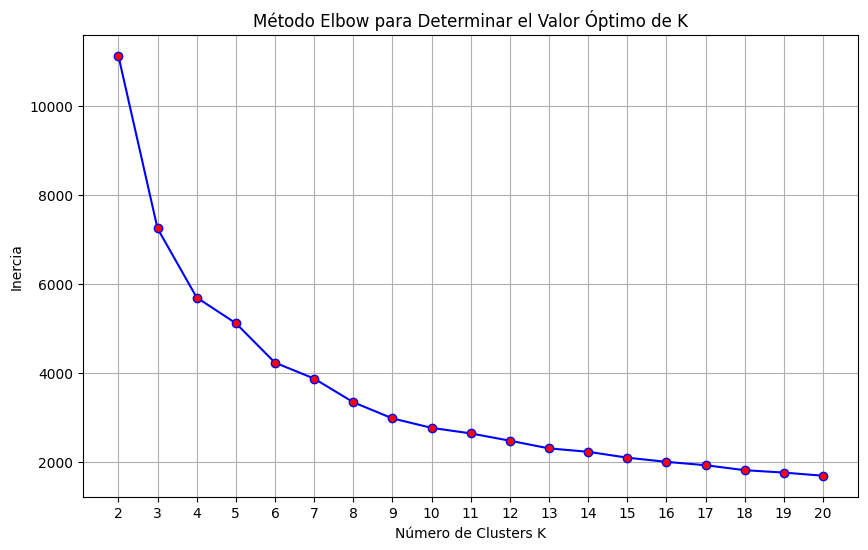

In [16]:
# Rango de K a probar
k_range = range(2, 21)

# Lista para almacenar las inercias
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el método Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', markerfacecolor='red')
plt.title('Método Elbow para Determinar el Valor Óptimo de K')
plt.xlabel('Número de Clusters K')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


#### Muestra en un gráfico de tartas la distribución de los distintos clusters

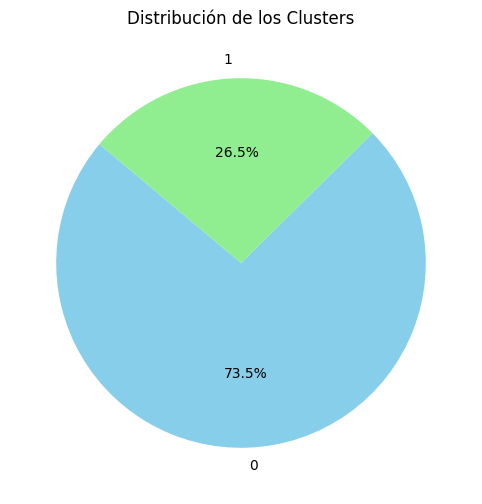

In [14]:

# Asumiendo que X ya está definido y preparado para el clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Añade las etiquetas de los clusters al DataFrame
df['Cluster'] = kmeans.labels_

# Calcula la distribución de los clusters
cluster_distribution = df['Cluster'].value_counts(normalize=True) * 100

# Grafica la distribución de los clusters en un gráfico de tartas
plt.figure(figsize=(8, 6))
plt.pie(cluster_distribution, labels=cluster_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribución de los Clusters')
plt.show()


<AxesSubplot:ylabel='Cluster'>

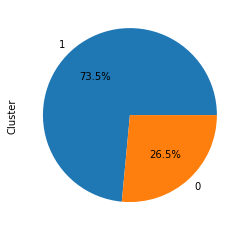

In [49]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")